# 이미지 처리 라이브러리

## 이미지 업로드


## OpenCV

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


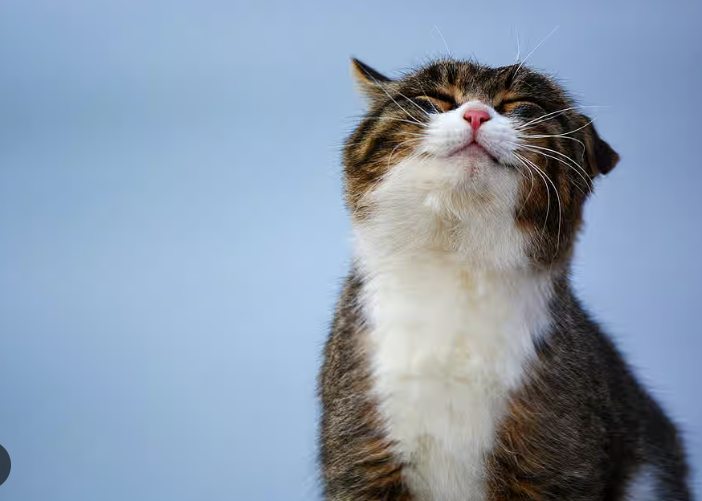

In [3]:
#이미지 읽어 출력하기
#모듈 임포트
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/drive')
#이미지 파일 경로
path = "/content/drive/MyDrive/ml-class-rhseung/data/cat.png"
#이미지 파일 읽기
img = cv2.imread(path)
#이미지 화면에 출력하기
cv2_imshow(img) #로컬 cv2.imshow("sample", img)


In [4]:
type(img)

numpy.ndarray

In [5]:
img.shape

(501, 702, 3)

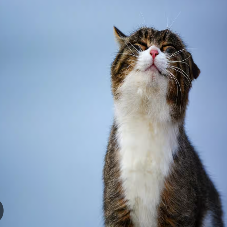

(227, 227, 3)

In [6]:
img_resize = cv2.resize(img, (227,227))
cv2_imshow(img_resize)
img_resize.shape

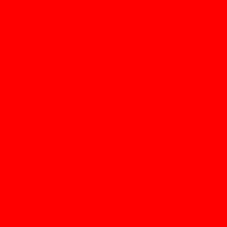

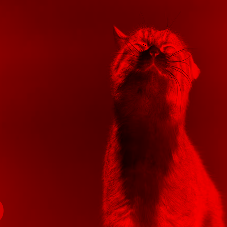

In [7]:
# 이미지를 만들어 저장하기

import numpy as np
import cv2

img_size = (227, 227)

# RGB가 아니고 BGR임
my_img = np.array([[[0,0,255] for _ in range(img_size[1])] for _ in range(img_size[0])], dtype='uint8')
cv2_imshow(my_img)
img3 = img_resize * my_img
cv2_imshow(img3)

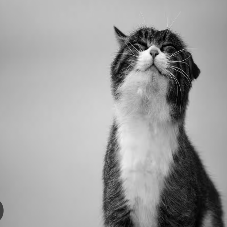

In [8]:
#색조 변환 및 색상 반전
img2 = cv2.cvtColor(img_resize, cv2.COLOR_RGB2GRAY)
cv2_imshow(img2)

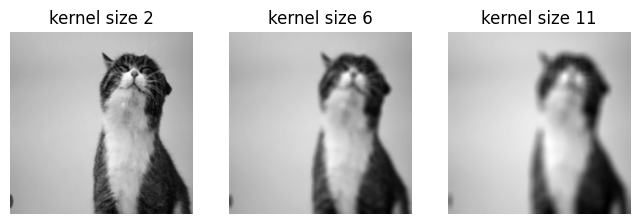

In [9]:
plt.figure(figsize=(8, 3))
for i, k in enumerate([2, 6, 11]):
    kernel = np.ones((k, k)) / k**2
    filtering = cv2.filter2D(img2, -1, kernel)
    plt.subplot(1, 3, i + 1)
    plt.imshow(filtering, cmap='gray')
    plt.title("kernel size {}".format(k))
    plt.axis("off")

plt.show()

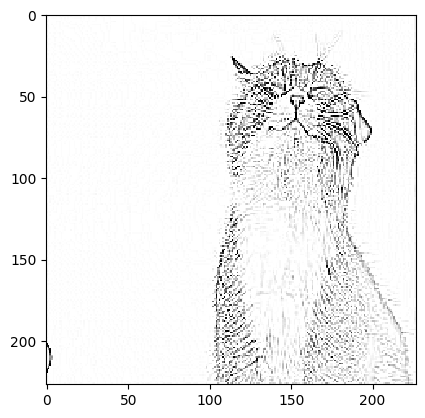

In [10]:
#라플라시안 필터 - 2차 미분을 적용한 필터입니다. 경계를 더 제대로 검출할 수 있음
kernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])
featuremap = cv2.filter2D(img2, -1, kernel)
# cv2_imshow(featuremap)
plt.imshow(featuremap,cmap=plt.cm.gray_r, interpolation = "nearest")

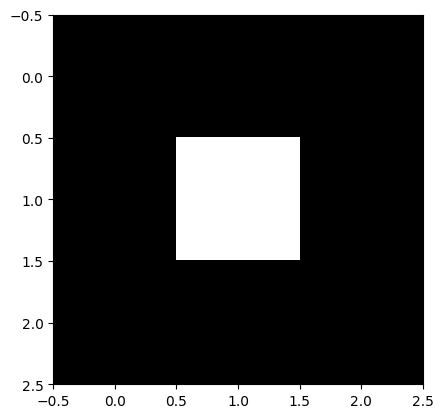

In [11]:
plt.imshow(kernel,cmap=plt.cm.gray_r, interpolation = "nearest")

## Pillow

<class 'PIL.PngImagePlugin.PngImageFile'>


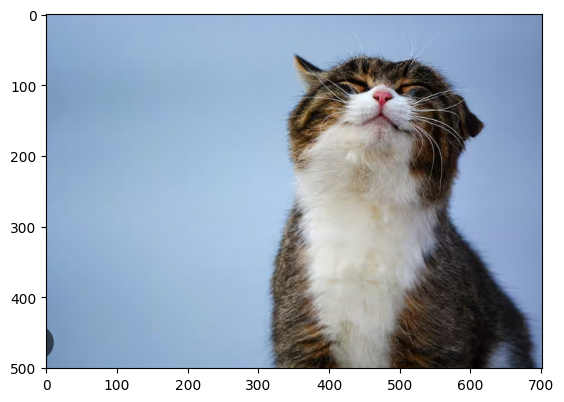

In [12]:
from PIL import Image, ImageOps
from PIL import ImageFilter

img = Image.open(path)
print(type(img))
plt.imshow(img)

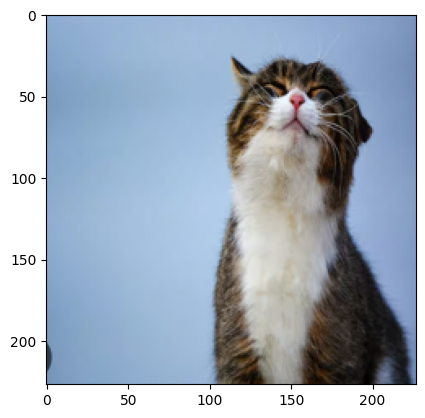

In [13]:
resize_img = img.resize((227,227))
plt.imshow(resize_img)

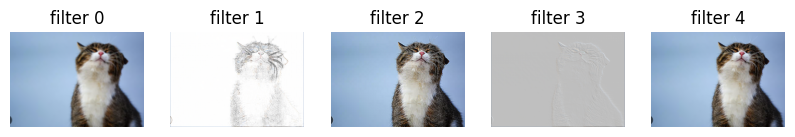

In [14]:
filter_list = [ImageFilter.BLUR, ImageFilter.CONTOUR, ImageFilter.EDGE_ENHANCE_MORE,
               ImageFilter.EMBOSS, ImageFilter.SHARPEN]

plt.figure(figsize=(10, 5))
for i in range(len(filter_list)):
  filter_img = img.filter(filter_list[i])
  plt.subplot(1, 5, i + 1)
  plt.imshow(filter_img)
  plt.title("filter {}".format(i))
  plt.axis("off")


In [15]:
image = Image.open(path)
size = (227,227)
image = ImageOps.fit(image, size, Image.ANTIALIAS)
image_array = np.asarray(image)
image_array

<ipython-input-15-616e286dad80>:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image = ImageOps.fit(image, size, Image.ANTIALIAS)


array([[[151, 179, 214, 255],
        [151, 179, 214, 255],
        [151, 180, 214, 255],
        ...,
        [138, 162, 202, 255],
        [137, 162, 202, 255],
        [136, 162, 202, 255]],

       [[151, 179, 214, 255],
        [151, 179, 214, 255],
        [151, 179, 214, 255],
        ...,
        [139, 162, 203, 255],
        [137, 163, 203, 255],
        [136, 163, 202, 255]],

       [[150, 179, 213, 255],
        [150, 179, 213, 255],
        [150, 179, 213, 255],
        ...,
        [140, 163, 204, 255],
        [138, 163, 203, 255],
        [137, 163, 203, 255]],

       ...,

       [[134, 167, 200, 255],
        [134, 167, 200, 255],
        [134, 167, 200, 255],
        ...,
        [ 25,  22,  20, 255],
        [ 25,  22,  20, 255],
        [ 14,  11,   9, 255]],

       [[134, 167, 200, 255],
        [134, 167, 200, 255],
        [134, 167, 200, 255],
        ...,
        [ 30,  27,  25, 255],
        [ 25,  22,  21, 255],
        [ 21,  18,  16, 255]],

       [[133

In [16]:
type(image)

PIL.Image.Image

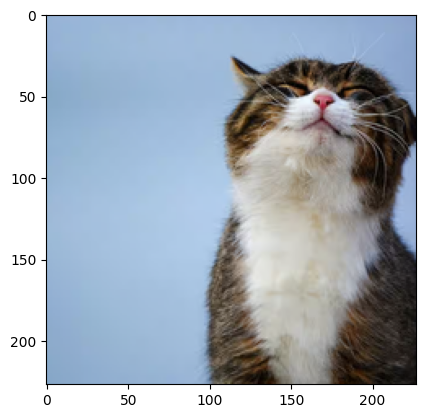

In [17]:
plt.imshow(image_array)

In [18]:
data = np.ndarray(shape=(1,227,227,3), dtype=np.float32)

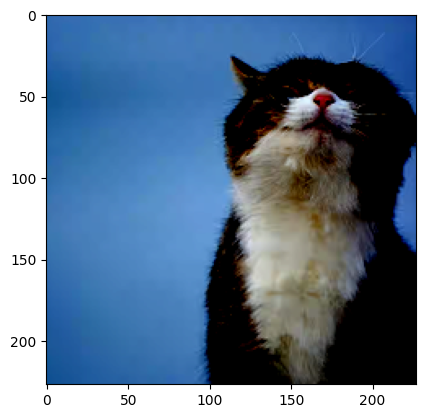

In [19]:
normalized_image_array = (image_array.astype(np.float32)/127.0)-1
plt.imshow(normalized_image_array)

# 데이터 전처리

In [20]:
!pip install torchvision
#https://pytorch.org/vision/0.9/transforms.html#

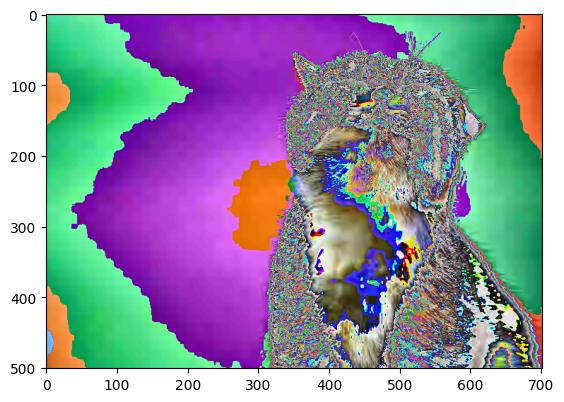

In [36]:
from PIL import Image, ImageOps
from PIL import ImageFilter
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torchvision.transforms import RandomHorizontalFlip, RandomCrop, Normalize
import cv2

img = cv2.imread('/content/drive/MyDrive/ml-class-rhseung/data/cat.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
img_ = T.ToPILImage()(img)
# plt.imshow(img_)
img_crop = RandomCrop((300,300),padding=4)(img_)
# plt.imshow(img_crop)
img_flip = RandomHorizontalFlip(p=0.9)(img_)
# plt.imshow(img_flip)
img_tensor = T.ToTensor()(img_)
# print(img_tensor)
norm_tensor = Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2))(img_tensor)
img_norm = T.ToPILImage()(norm_tensor)
plt.imshow(img_norm)

In [38]:
#이미지 증강
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
])

for i in range(10):
    augmented_image = transform(img)
    augmented_image.save(f"/content/imgs/img{i}.jpg")


# OpenCV 활용 얼굴 찾기

In [39]:
#https://github.com/kipr/opencv/tree/master/data/haarcascades
model_path = "/content/drive/MyDrive/ml-class-rhseung/data/haarcascade_frontalface_default.xml"

()


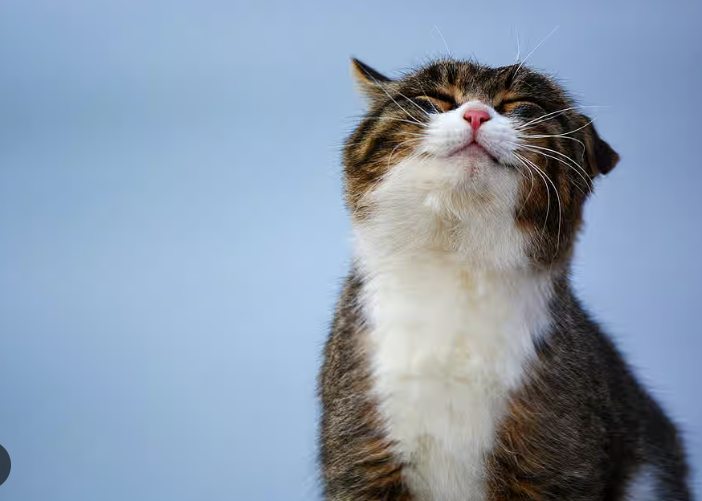

In [40]:
import cv2 #OpenCV 영상처리

#classifier
faceCascade = cv2.CascadeClassifier(model_path)
img = cv2.imread('/content/drive/MyDrive/ml-class-rhseung/data/cat.png')
count = 0

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #흑백으로
faces = faceCascade.detectMultiScale(
        gray,#검출하고자 하는 원본이미지
        scaleFactor = 1.2, #검색 윈도우 확대 비율, 1보다 커야 한다
        minNeighbors = 6, #얼굴 사이 최소 간격(픽셀)
        minSize=(5,5) #얼굴 최소 크기. 이것보다 작으면 무시
)
print(faces)
#얼굴에 대해 rectangle 출력
for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  count += 1

cv2_imshow(img)